# DSC630 Predictive Analitics
# Project
## Astrid Fuentes
## August 10th, 2021



### Analyze data to predict if an animal will survive the shelter.


In [1]:
%pwd # verify my working directory

'/Users/astrid/Documents/GitHub/DSC550'

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
from yellowbrick.features import Rank2D # visulization of the correlation
# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')
from yellowbrick.features import ParallelCoordinates

In [3]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
# Read my data file
data = pd.read_csv('project/shelter.csv')

In [5]:
# Look at the dimensions of the data frame
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (12521, 10)


In [6]:
# Take a look at the data
# Outcome type 1 =Adopted, 0= Died or Euthanized
print(data.head(5))

  AnimalID    Name        DateTime  OutcomeType OutcomeSubtype AnimalType  \
0  A656520   Emily  10/13/13 12:44            0      Suffering        Cat   
1  A686464  Pearce   1/31/15 12:28            1         Foster        Dog   
2  A671784    Lucy    2/4/14 17:17            1            NaN        Dog   
3  A677747     NaN     5/3/14 7:48            1        Offsite        Dog   
4  A666320     NaN   11/4/13 14:48            1            NaN        Dog   

  SexuponOutcome AgeuponOutcome                          Breed        Color  
0  Spayed Female             <1         Domestic Shorthair Mix  Cream Tabby  
1  Neutered Male              2                   Pit Bull Mix   Blue/White  
2  Spayed Female             <1  American Pit Bull Terrier Mix    Red/White  
3  Spayed Female             <1                  Cairn Terrier        White  
4  Spayed Female              2        Miniature Schnauzer Mix       Silver  


In [7]:
#what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
        OutcomeType
count  12521.000000
mean       0.860075
std        0.346923
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Summarized Data
       AnimalID  Name     DateTime OutcomeSubtype AnimalType SexuponOutcome  \
count     12521  9908        12521           3701      12521          12521   
unique    12521  4128        12146             14          2              5   
top     A699168   Max  1/3/16 9:37         Foster        Dog  Neutered Male   
freq          1    67            4           1800       7392           5585   

       AgeuponOutcome                   Breed        Color  
count           12519                   12521        12521  
unique             22                     954          279  
top                <1  Domestic Shorthair Mix  Black/White  
freq             6463                    3920         1370  


In [8]:
#display length of data
print("The numer of records in the file is:", len(data))

The numer of records in the file is: 12521


In [9]:
#display 
print(data.OutcomeType.unique())

[0 1]


In [10]:
#display 
print(data.AnimalType.unique())

['Cat' 'Dog']


In [11]:
#display how many animals survived (1) or died/euthanized (2)
print("The number of animals based on survival is: \n ", data['OutcomeType'].value_counts())

The number of animals based on survival is: 
  1    10769
0     1752
Name: OutcomeType, dtype: int64


In [12]:
#display how many animals were in each type
print("The number of animals based species is: \n ", data['AnimalType'].value_counts())

The number of animals based species is: 
  Dog    7392
Cat    5129
Name: AnimalType, dtype: int64


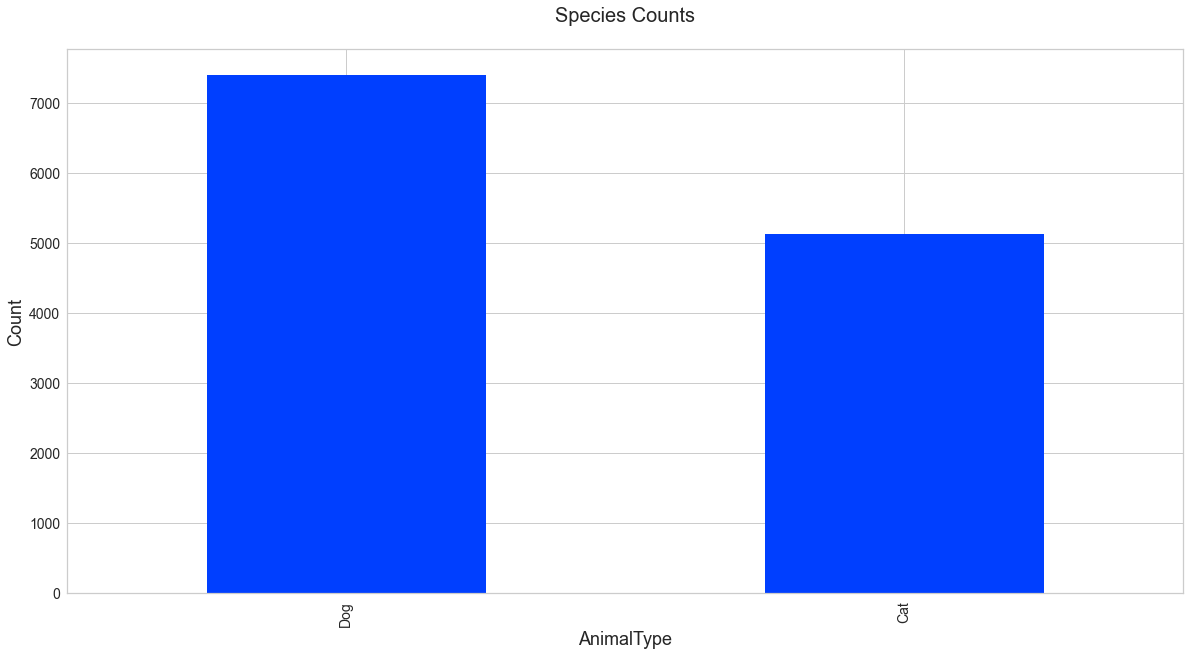

In [13]:
#Step 3:  Create some bar charts to show animals
# display bar chart of animals per species
ax = data['AnimalType'].value_counts().plot(kind='bar', fontsize=14)
ax.set_title('Species Counts\n', fontsize=20)
ax.set_xlabel('AnimalType', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

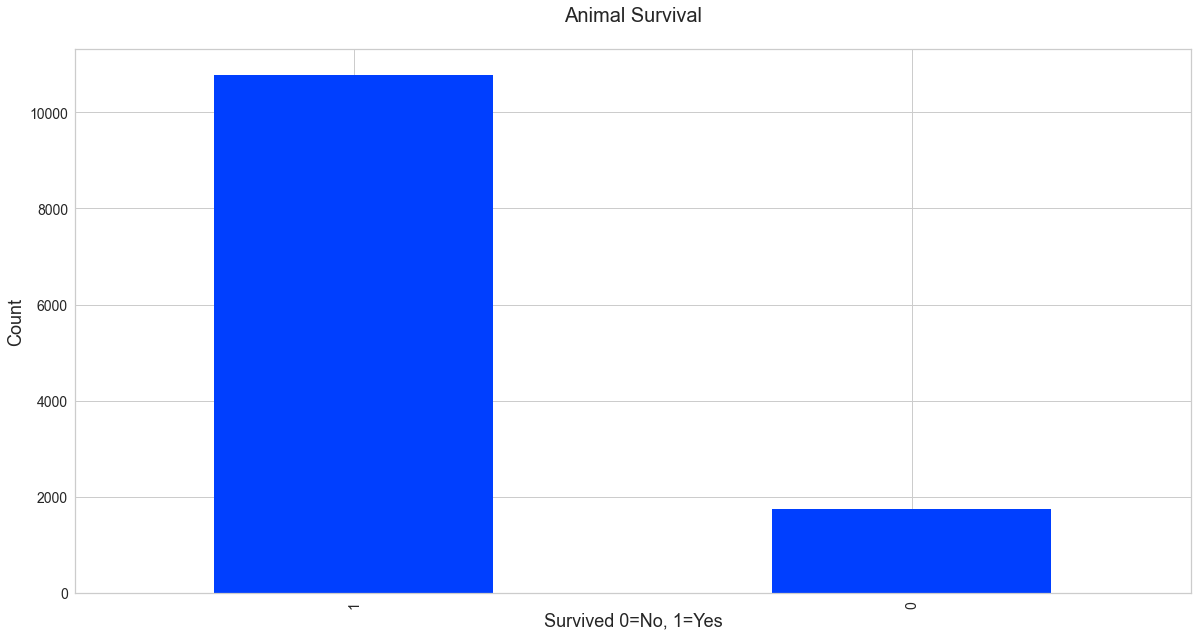

In [14]:
#display bar chart of Survival sorted by counts
ax = data['OutcomeType'].value_counts().plot(kind='bar', fontsize=14)
ax.set_title('Animal Survival\n', fontsize=20)
ax.set_xlabel('Survived 0=No, 1=Yes', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

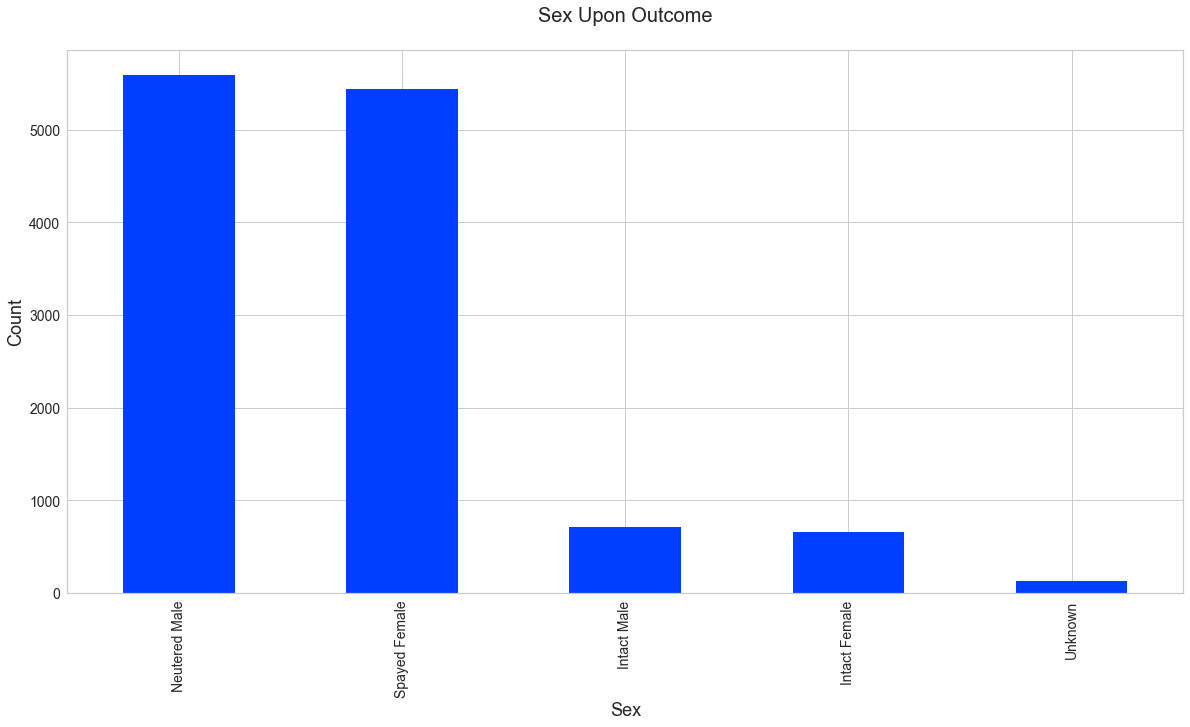

In [15]:
#display bar chart of Survival sorted by counts
ax = data['SexuponOutcome'].value_counts().plot(kind='bar', fontsize=14)
ax.set_title('Sex Upon Outcome\n', fontsize=20)
ax.set_xlabel('Sex', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

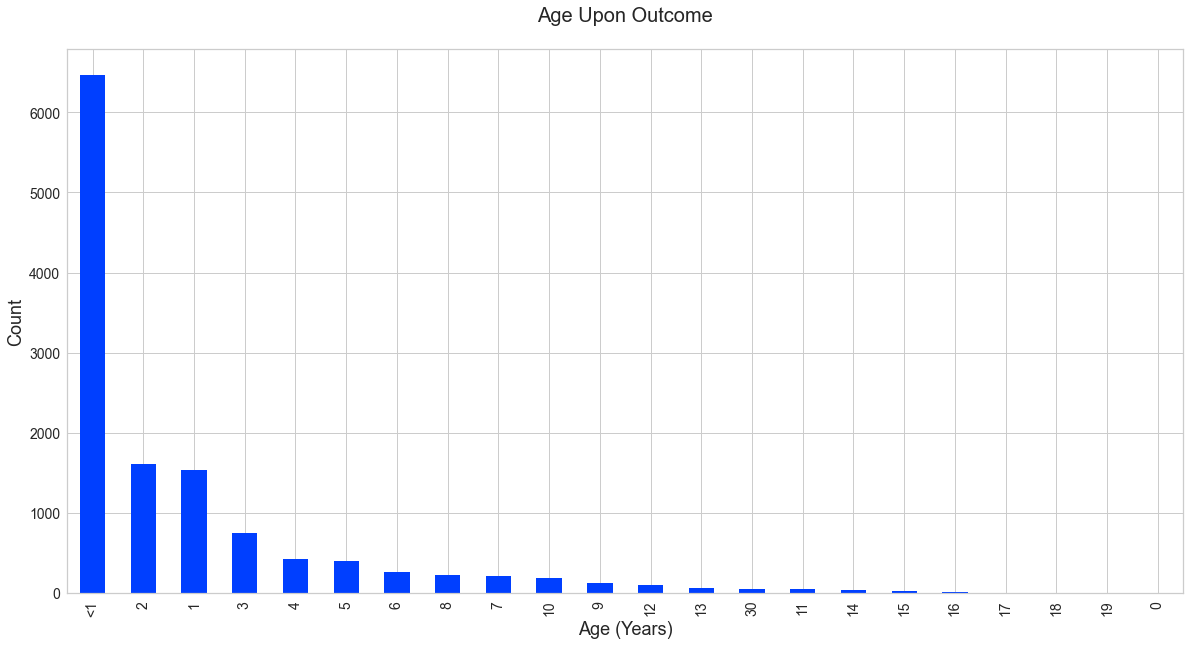

In [16]:
#display bar chart of Age of animal upon outcome
ax = data['AgeuponOutcome'].value_counts().plot(kind='bar', fontsize=14)
ax.set_title('Age Upon Outcome\n', fontsize=20)
ax.set_xlabel('Age (Years)', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

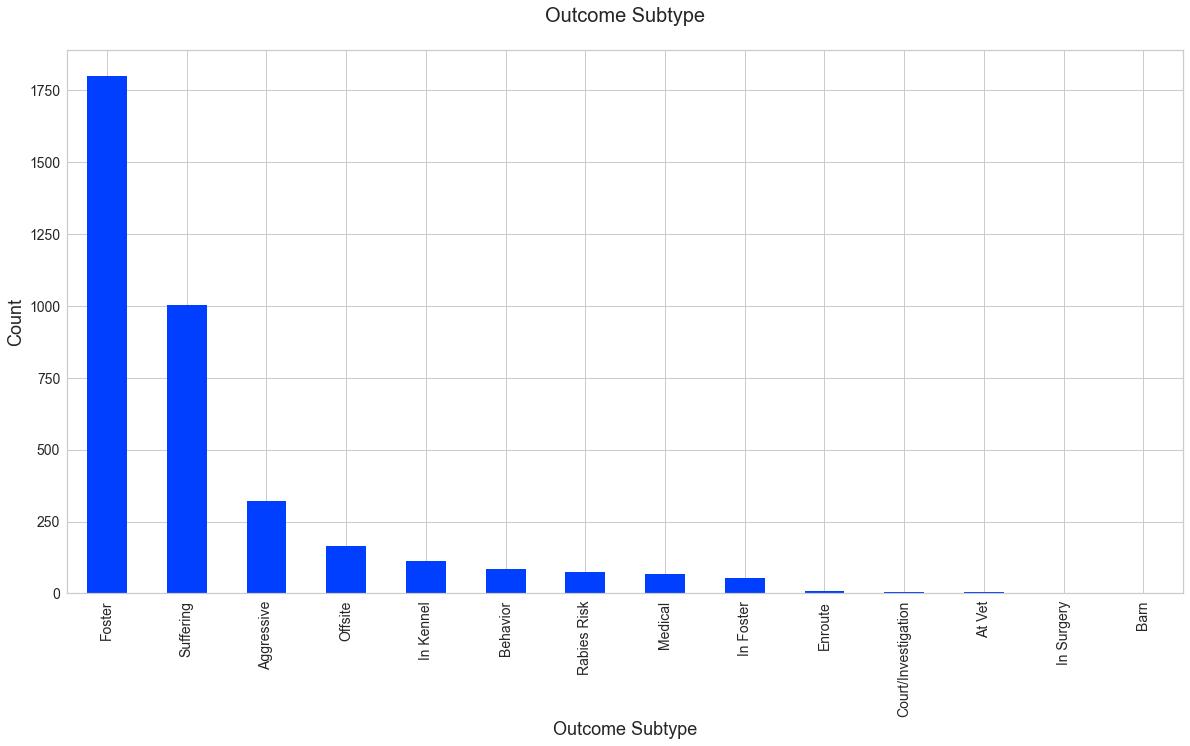

In [17]:
#display bar chart of Outcome Subtype of animal upon outcome
ax = data['OutcomeSubtype'].value_counts().plot(kind='bar', fontsize=14)
ax.set_title('Outcome Subtype\n', fontsize=20)
ax.set_xlabel('Outcome Subtype', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

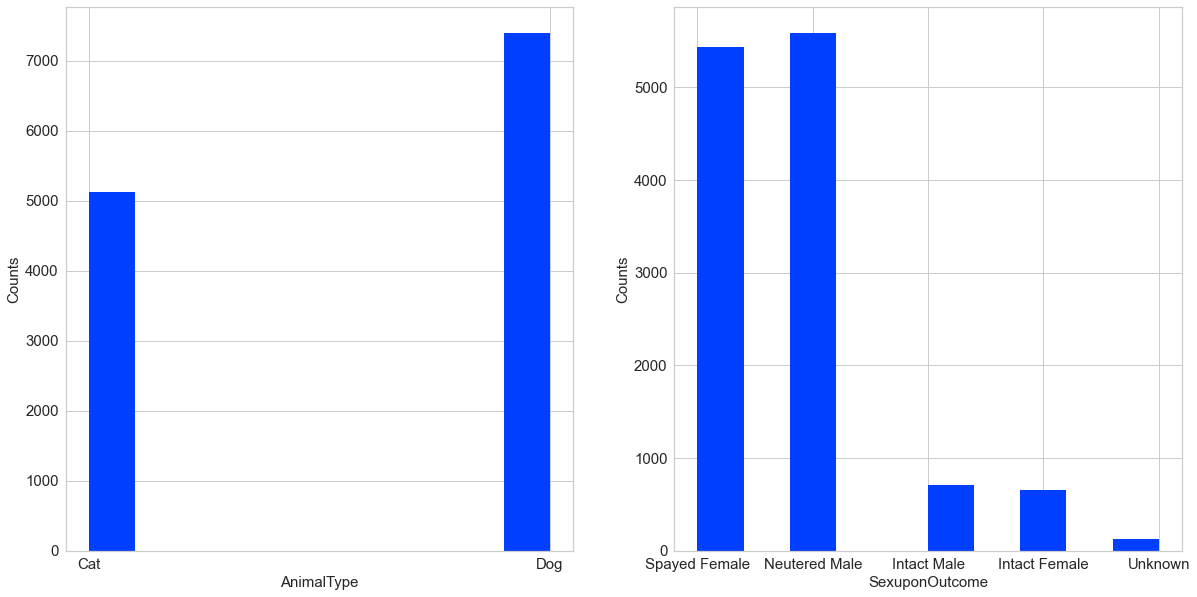

In [18]:
# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)
# Specify the features of interest
num_features = ['AnimalType', 'SexuponOutcome']
xaxes = num_features
yaxes = ['Counts', 'Counts']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=10)
    ax.set_xlabel(xaxes[idx], fontsize=15)
    ax.set_ylabel(yaxes[idx], fontsize=15)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [19]:
# Get column names to be used later
col=data.columns.tolist()
print(col)

['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']


In [20]:
# Rename columns
data= data.rename(columns = {'SexuponOutcome': 'Sex', 'AgeuponOutcome': 'Age'}, inplace = False)

In [21]:
#Drop columns we are not interested in
data = data.drop(['DateTime', 'Name', 'OutcomeSubtype',], axis=1)

We have renamed 'SexuponOutcome' to 'Sex' and 'AgeuponOutcome' to 'Age' to make them easier to use in our code.
We also dropped variables we are not planning on using. The Name of the animal is irrelvant to our analysis. The date of the outcome is also not going to be used as we are not analyzing time series or anything similar in this project. The OutcomeSubtype provides specific information about the outcome but it is blank for many animals and we can't do a good guess in order to fill it in. It best to only use outcome and drop OutcomeSubtype for now.

In [22]:
# Check for null values using isnull()
print("The column AnimalID contains NaN - %s " % data.AnimalID.isnull().values.any())
print("The column OutcomeType contains NaN - %s " % data.OutcomeType.isnull().values.any())
print("The column AnimalType contains NaN - %s " % data.AnimalType.isnull().values.any())
print("The column Sex contains NaN - %s " % data.Sex.isnull().values.any())
print("The column Age contains NaN - %s " % data.Age.isnull().values.any())
print("The column Breed contains NaN - %s " % data.Breed.isnull().values.any())
print("The column Color contains NaN - %s " % data.Color.isnull().values.any())

The column AnimalID contains NaN - False 
The column OutcomeType contains NaN - False 
The column AnimalType contains NaN - False 
The column Sex contains NaN - False 
The column Age contains NaN - True 
The column Breed contains NaN - False 
The column Color contains NaN - False 


From the above, we can see that the Age contains nulls valuables. We will fill these in with the median.
However, before we can do that, we need to convert the strings '<1' to '0' considering these animals are less than 1 year old. 

In [23]:
# Replace Age values of '<1' with 0.
data['Age'] = data['Age'].replace(['<1'],'0')

In [24]:
# fill in missing values and eliminate features
#fill the missing AgeuponOutcome data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age'])


In [25]:
# check the result
print(data['Age'].describe())

count     12521
unique       22
top           0
freq       6464
Name: Age, dtype: object


In [26]:
# Verify Age no longer has null values
print("The column Age contains NaN - %s " % data.Age.isnull().values.any())

The column Age contains NaN - False 


In [27]:
# To identify duplicates we can use the duplicated() function
print("AnimalID is duplictaed - {}".format(any(data.AnimalID.duplicated())))

AnimalID is duplictaed - False


In [28]:
#convert categorical data to numbers
#get the categorical data
cat_features = ['AnimalType', 'Sex', 'Breed', 'Color']
data_cat = data[cat_features]
data_cat = data_cat.replace({'AnimalType': {1: 'Cat', 2: 'Dog'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   AnimalType_Cat  AnimalType_Dog  Sex_Intact Female  Sex_Intact Male  \
0               1               0                  0                0   
1               0               1                  0                0   
2               0               1                  0                0   
3               0               1                  0                0   
4               0               1                  0                0   
5               0               1                  0                0   
6               1               0                  0                0   
7               0               1                  0                0   

   Sex_Neutered Male  Sex_Spayed Female  Sex_Unknown  Breed_Abyssinian Mix  \
0                  0                  1            0                     0   
1                  1                  0            0                     0   
2                  0                  1            0                     0   
3                  0          

In [29]:
# Create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Age']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

In [30]:
# create a whole target dataset that can be used for train and validation data splitting
#data_model_y = data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
data_model_y = data['OutcomeType']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split



In [31]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [32]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  8764
No. of samples in validation set: 3757


No. of survived and not-survived in the training set:
1    7545
0    1219
Name: OutcomeType, dtype: int64


No. of survived and not-survived in the validation set:
1    3224
0     533
Name: OutcomeType, dtype: int64


In [33]:
# Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [40]:
# Instantiate the classification model 
model = LogisticRegression(penalty='l1', solver='liblinear')
model

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

0.9222784136278946

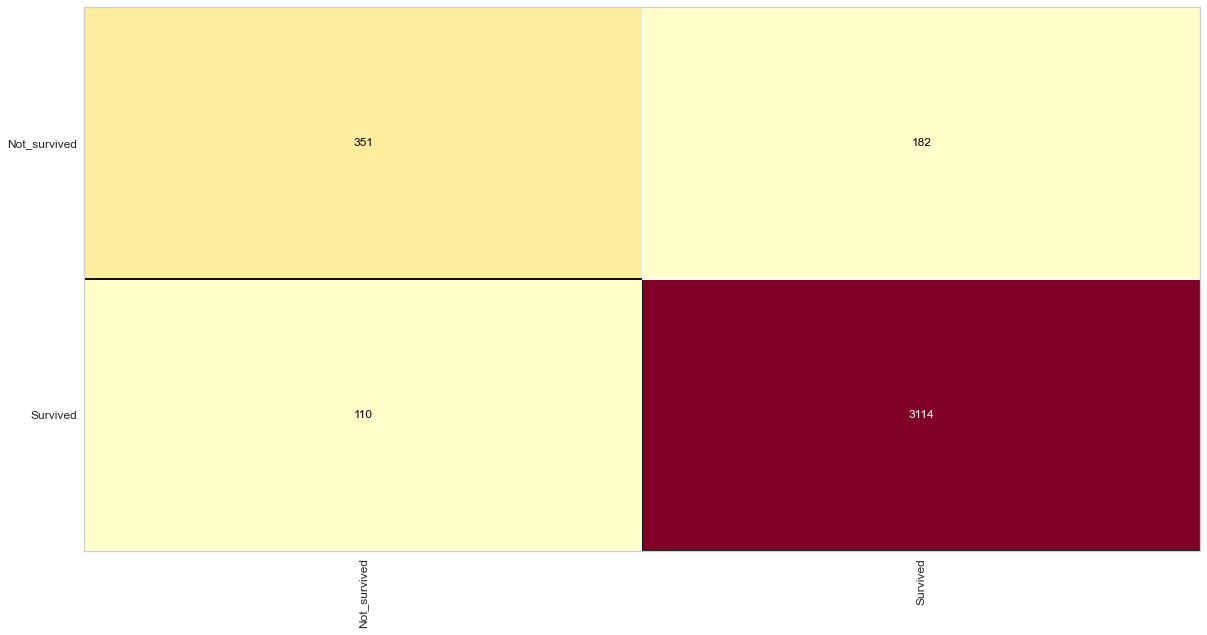

In [35]:
#Fit the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

## Based on the above confusion matrix, our model correctly predicted the survival of 3114 animals and the non-survival of 351 animals. The model incorrectly predicted the outcome of 292 animals. This model has an accuracy of 92.2% which is very good.

<Figure size 1440x720 with 0 Axes>

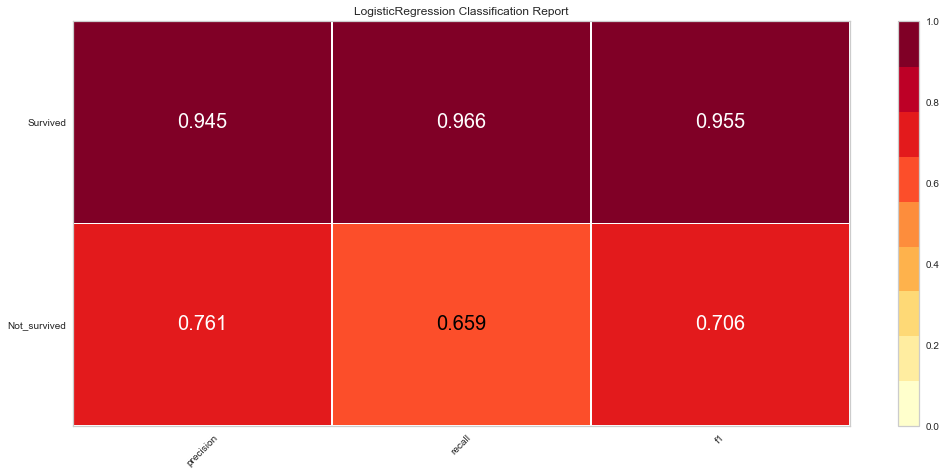

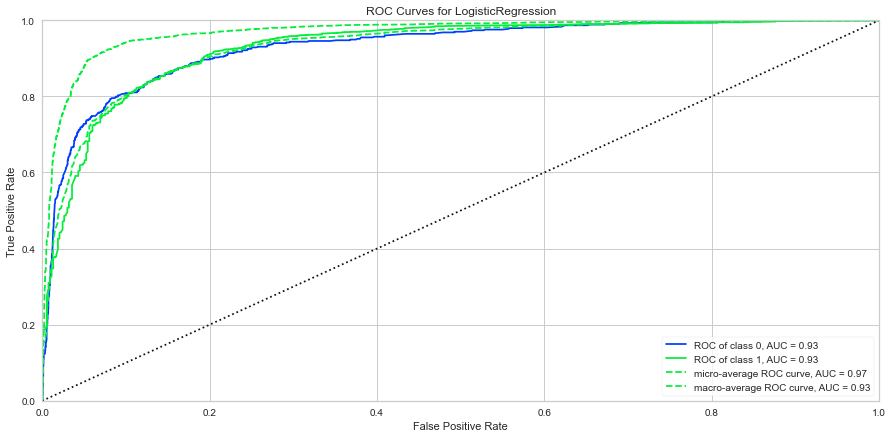

In [36]:
# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

## Based on the above the model performed better at predicting the survivals with an accuracy of 94.5% while the non-survivals were predicted with a precision of 76.1%.
## As a reminder our model was built to predict Outcome Type (survived or not) using Age and the categorical dummy variables of Sex, Animal Type, Breed, and Color. 
## In the previous submission, we only used the categorical variables of Sex and Animal Type. After introducing the Breed and color, the overall precision of the model increased from 92.1% to 92.2% which is not a huge improvement.

In [66]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print(score)

0.9222784136278946


In [80]:
y_pred=model.predict(X_val)

In [85]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       533
           1       0.94      0.97      0.96      3224

    accuracy                           0.92      3757
   macro avg       0.85      0.81      0.83      3757
weighted avg       0.92      0.92      0.92      3757



In [86]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

Accuracy: 0.9222784136278946
Precision: 0.9447815533980582
Recall: 0.9658808933002482


Classification rate of 92% is considered as very good accuracy.
With regards to prediction, when the Logistic Regression model predicted Animals are going to survive, the animals survived 94% fo the time.
Recall: For those animals who survived in the test set, the Logistic Regression model can identify 96% of them. 

### Now let's try to identify which variables and values contribute the most to survival or non survival.

In [160]:
#Obtain model coefficients
coefficients = model.coef_
coef=coefficients [0,].tolist()

In [138]:
# Obtain model variable Names
col2=data_model_X.columns.tolist()

In [139]:
# Create data frame with the model variables and their respective coefficients
d = {'Variable':col2,'Coefficient':coef}
df = pd.DataFrame(d)

In [161]:
# Drop variables where the coefficient is 0 (no contribution to the model)
model_coef_df = df[df['Coefficient'] != 0.000000]
model_coef_df

,Variable,Coefficient
0,Age,-0.253422
2,AnimalType_Dog,-0.043054
3,Sex_Intact Female,-0.010065
4,Sex_Intact Male,-0.651436
5,Sex_Neutered Male,3.853829
...,...,...
1225,Color_White/Orange Tabby,0.761641
1227,Color_White/Red,-1.687372
1231,Color_White/Tan,-0.179781
1233,Color_White/White,-1.649736


Since we still have too many characteristics, let's filter out some more

In [163]:
# Pick variables where the absolute value of the coefficient is greater than 1.5 (has more contribution to the model)
model_coef_df = df[abs(df['Coefficient']) > 1.5]
model_coef_df.sort_values(by=['Coefficient'])


,Variable,Coefficient
7,Sex_Unknown,-3.893075
747,Breed_Pit Bull Mix,-2.028470
666,Breed_Mastiff Mix,-1.897186
1227,Color_White/Red,-1.687372
1233,Color_White/White,-1.649736
746,Breed_Pit Bull,-1.643948
749,Breed_Pit Bull/Australian Cattle Dog,-1.576975
815,Breed_Queensland Heeler/Pit Bull,-1.543750
317,Breed_Chihuahua Shorthair,1.547157
257,Breed_Cairn Terrier Mix,1.843269


### From the above, we can see that the Breed is a variable that highly contributes to the model. We can see that several variables related to Pit Bull breeds contribute negatively to the survival of the animal. 
### We can also see that Miniature Poodle and Miniature Schnauzer breeds as well as animals with Sable color have more chances of survival based on the variable coefficient positively contributing to the model. 
### The Sable color as well as the Neutered/Spayed variables might only be contributing to the model because they are seen more frequently in the data set. This might need further analysis.

In [166]:
df[df['Variable'] == 'Color_Black']

,Variable,Coefficient
965,Color_Black,-0.236407


### I have a special interest for black cats. From the model it looks like being a black animal negatively impacts the changes of being adopted. However, the coefficient's absolute value is not as big as other shown above.